# Unit Analysis: Visualize

Visualize the units and custom units most commonly used in the EDI Repository

In [65]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ud = pd.read_csv('unitDictionary.csv')

In [2]:
def jsonToDf(j):

    file = open(j)

    d = json.load(file)

    names = []
    counts = []

    for key, value in list(d.items()):
        names.append(key)
        counts.append(value)

    df = {
        "Unit Name": names,
        "Unit Count": counts} 

    return pd.DataFrame(df).sort_values(by=['Unit Count'], ascending=False)

# Questions
What are the most popular custom units?

How many occurrences of standard units being listed as custom?

Are ezEML datasets more likely to contain at least 1 custom units?

Do ezEML datasets contain more custom units generally?

In [3]:
jsonToDf('customUnitsCount.json').head(20)

,Unit Name,Unit Count
23,percent,443
109,pct areal cover,196
75,partsPerMillion,125
7,numberPerHectare,122
203,catchperuniteffort,112
545,numberPer0.1MillimeterCubed,110
548,numberPer100Milliliters,90
2,microequivalentsPerLiter,82
42,microSiemenPerCentimeter,69
6,metersPerHectare,62


In [49]:
custom_units = jsonToDf('customUnitsDatasetCount.json')


exactMatch = {"Unit Name": [],
                "exactMatch": []}
for i in range(len(custom_units)):
    if (custom_units['Unit Name'][i] in pd.Series(ud['id']).unique()):
        exactMatch["Unit Name"].append(custom_units['Unit Name'][i])
        exactMatch['exactMatch'].append(1)
    else:
        exactMatch["Unit Name"].append(custom_units['Unit Name'][i])
        exactMatch['exactMatch'].append(0)
custom_units = custom_units.merge(pd.DataFrame.from_dict(exactMatch))
custom_units.to_csv('./custom_units.csv')



577 unique custom units across EDI scoped data packages
30 exact matches (case sensitive) to Standard Units
443 occur in only one dataset
                     Unit Name  Unit Count  exactMatch
0                      percent          34           1
1    microSiemensPerCentimeter          24           0
2    microsiemensPerCentimeter          22           0
3   nephelometricTurbidityUnit          17           0
4     microSiemenPerCentimeter          16           0
5                 nominalMonth          15           0
6     microequivalentsPerLiter          14           0
7               decimal degree          12           0
8              partsPerMillion          12           0
9            milligramsPerGram          11           0
10                    unitless          10           0
11            numberPerHectare           8           1
12                          pH           7           0
13               decimalDegree           7           0
14                        feet       

spelling error = missed a standard unit by a misspelling, often due to plurals, case, or squareMeter/meterSquared-type confusion

logic error = likely should have gone with a different unit that is standard (ratio vs. dimensionless, cellsPerLiter vs. numberPerLiter, mg C / kg soil vs. milligramPerKilogram)

577 unique custom units across EDI scoped data packages
30 exact matches (case sensitive) to Standard Units
73 are near matches to Standard Units (off by spelling error)
91 are instances where data author should've opted for a Standard Unit
443 occur in only one dataset
                     Unit Name  Unit Count  exactMatch
0                      percent          34           1
1    microSiemensPerCentimeter          24           0
2    microsiemensPerCentimeter          22           0
3   nephelometricTurbidityUnit          17           0
4     microSiemenPerCentimeter          16           0
5                 nominalMonth          15           0
6     microequivalentsPerLiter          14           0
7               decimal degree          12           0
8              partsPerMillion          12           0
9            milligramsPerGram          11           0
10                    unitless          10           0
11            numberPerHectare           8           1
12            

<AxesSubplot:xlabel='Unit Count Binned', ylabel='count'>

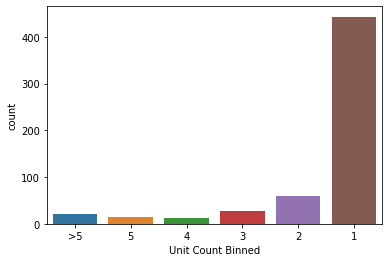

In [68]:
annotated = pd.read_csv('custom_units_annotated.csv')
print(len(custom_units), "unique custom units across EDI scoped data packages")
print(np.sum(custom_units['exactMatch']), "exact matches (case sensitive) to Standard Units")
print(np.sum(annotated['spellingError'] == 1), "are near matches to Standard Units (off by spelling error)")
print(np.sum(annotated['logicError'] == 1), "are instances where data author should've opted for a Standard Unit")
print(np.sum(custom_units['Unit Count'] == 1), "occur in only one dataset")
print(custom_units.head(20))

annotated['Unit Count Binned'] = annotated['Unit Count'].mask(annotated['Unit Count'] > 5, ">5") 

sns.countplot(x='Unit Count Binned', data=annotated)

/var/folders/yq/g14jm11d2xnbw19wkt0r171w0000gn/T/ipykernel_25183/1311721907.py:35: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,500)


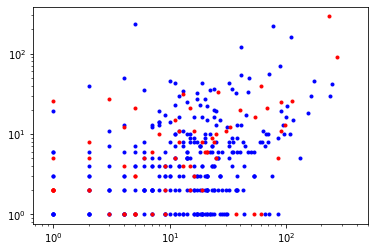

In [75]:
file = open('unitCount.json')

d = json.load(file)

pid = list(d.keys())
standard = []
custom = []
ezEML = []

for key in pid:
    standard.append(d[key]['standardCount'])
    custom.append(d[key]['customCount'])
    ezEML.append(d[key]['ezEML'])

df = {
    "packageid": pid,
    "standard_unit_count": standard,
    "custom_unit_count": custom,
    "ezeml_generated": ezEML} 

unitCountDf = pd.DataFrame(df).sort_values(by=['custom_unit_count'], ascending=False)

Xe = unitCountDf[unitCountDf['ezeml_generated'] == True]['standard_unit_count']
Ye = unitCountDf[unitCountDf['ezeml_generated'] == True]['custom_unit_count']

X = unitCountDf[unitCountDf['ezeml_generated'] == False]['standard_unit_count']
Y = unitCountDf[unitCountDf['ezeml_generated'] == False]['custom_unit_count']



plt.scatter(X, Y, c='b', marker=".")
plt.scatter(Xe, Ye, c='r', marker=".")
plt.yscale('log')
plt.xscale('log')
plt.xlim(0,500)
plt.show()

